In [42]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares
import matplotlib.ticker as ticker

R = 1.1e6

data=np.loadtxt("fwhm_ch_900mm2.txt")
V_bias = data[:,0]
V_buio = data[:,1]*1e-3 #in mV
ch = data[:,2]
err_ch = data[:,3]
fwhm = data[:,4]
err_fwhm = data[:,5]
fwhm_ch= data[:,6]
err_fwhm_ch = data[:,7]

I_buio = []
err_vbias=[]
err_vbuio=[]
err_Ibuio=[]

for i in range(len(V_buio)):
    
    I_buio.append(V_buio[i]/R*1e6) #in uA
    err_vbias.append(0.5/100* V_bias[i])
    err_vbuio.append(0.5/100*V_buio[i])
    err_Ibuio.append(err_vbuio[i]*1/R*1e6) #in uA



Vbias con fwhm minima = 20.614430828106666


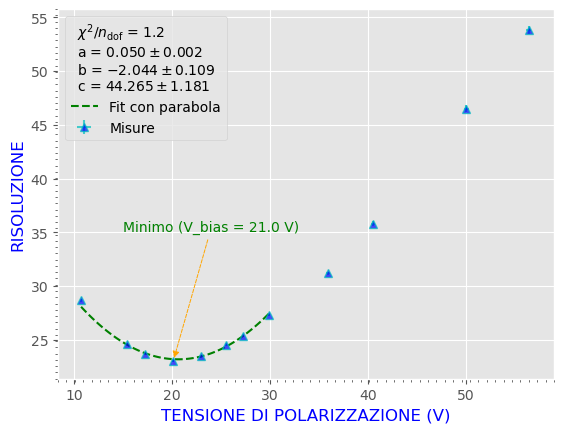

In [104]:
#V bias vs fwhm


func1 = lambda x, a, b, c: a*x**2+b*x+c 

least_squares = LeastSquares (V_bias, fwhm, list(map(lambda x: x/1.4, err_fwhm)), func1)
my_minuit = Minuit (least_squares, a = 0, b = 0, c = 0)
least_squares.mask = (V_bias < 30) & (15 < V_bias)
my_minuit.migrad ()  
my_minuit.hesse ()  
print("Vbias con fwhm minima = " + str(-my_minuit.values[1]/2/my_minuit.values[0]) )
#display(my_minuit)

x = np.linspace(V_bias[0], V_bias[7], 100)

fig, ax = plt.subplots()
plt.errorbar(V_bias, fwhm, xerr= err_vbias, yerr= list(map(lambda x: x/1.4, err_fwhm)), linestyle="None", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.plot(x, func1(x, my_minuit.values[0], my_minuit.values[1], my_minuit.values[2]), linestyle="--", color="g", label="Fit con parabola")
plt.grid("on")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="blue")
plt.ylabel("RISOLUZIONE", color="blue")

plt.style.use("ggplot")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(my_minuit.parameters, my_minuit.values, my_minuit.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=True)

ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))

ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

ax.annotate(f'Minimo (V_bias = {round(-my_minuit.values[1]/2/my_minuit.values[0],0)} V)', xy=(V_bias[3], fwhm[3]),
             xycoords='data',
             xytext=(15, 35.1),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='orange',
                             lw=.7,
                             ls='--'),
            color="g"
           )



plt.show()

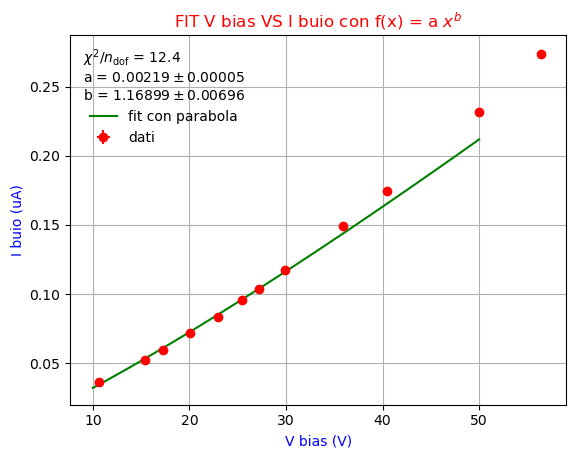

In [3]:

func2 = lambda x, a, b: a*x**b #fit retta per V_bias VS I_buio per 900mm2

n = 3 #quanti dati dalla fine esclusi

err=[]
for i in range(len(V_bias)-n):
    err.append(I_buio[i]*np.sqrt((err_Ibuio[i]/I_buio[i])**2+(err_vbias[i]/V_bias[i])**2))


least_squares = LeastSquares (V_bias[:-n], I_buio[:-n], err, func2)
my_minuit = Minuit (least_squares, a=0, b=0) 
my_minuit.migrad ()  
my_minuit.hesse ()
#display(my_minuit)

x2 = np.linspace(10, 50, 100)
plt.title(f"FIT V bias VS I buio con f(x) = a $x^b$", color="RED")
plt.errorbar(V_bias, I_buio, color="red", xerr=err_vbias, yerr=err_Ibuio, linestyle="none", marker = "o", label="dati")
plt.plot(x2, func2(x2, my_minuit.values[0], my_minuit.values[1]), color="green", label="fit con parabola")
plt.grid("on")
plt.xlabel("V bias (V)", color="blue")
plt.ylabel("I buio (uA)", color="blue")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(my_minuit.parameters, my_minuit.values, my_minuit.errors):
    fit_info.append(f"{p} = ${v:.5f} \\pm {e:.5f}$")

plt.legend(title="\n".join(fit_info), frameon=False)

plt.show()



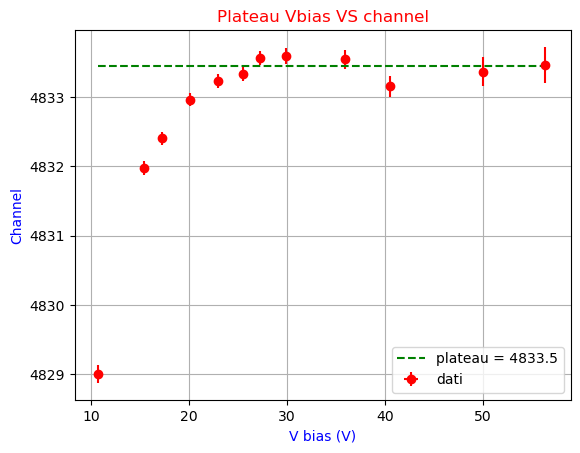

In [4]:


plt.title(f"Plateau Vbias VS channel", color="RED")
plt.errorbar(V_bias, ch, color="red", xerr=err_vbias, yerr=err_ch, linestyle="none", marker = "o", label="dati")
plt.grid("on")
plt.xlabel("V bias (V)", color="blue")
plt.ylabel("Channel", color="blue")
plt.hlines(sum(ch[6:])/len(ch[6:]), V_bias[0], V_bias[-1], linestyle="dashed", color="green", label=f"plateau = {round(sum(ch[6:])/len(ch[6:]),1)}")
plt.legend()
plt.show()



Vbias con fwhm minima = 20.621291718203587


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.47 (χ²/ndof = 0.6)       │              Nfcn = 96               │
│ EDM = 1.21e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  10.3e-3  │  0.7e-3   │            │            │         │         │       │
│ 1 │ b    │  -0.423   │   0.032   │            │            │         │         │       │
│ 2 │ c    │   9.16    │   0.34    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │ 4.97e-07 -22.2e-6 237.3e-6 │
│ b │ -22.2e-6    0.001  -0.0108 │
│ c │ 237.3e-6  -0.0108    0.118 │
└───┴────────────────────────────┘

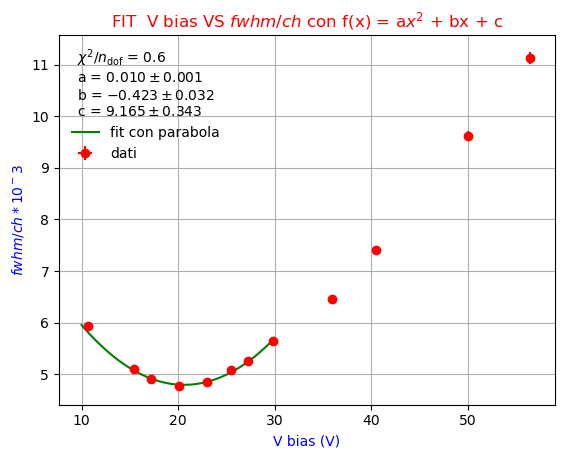

In [5]:


func3 = lambda x, a, b, c: a*x**2+b*x+c 

least_squares = LeastSquares (V_bias, fwhm_ch, err_fwhm_ch, func3)
my_minuit = Minuit (least_squares, a = 0, b = 0, c = 0)
least_squares.mask = (V_bias < 30) & (15 < V_bias)
my_minuit.migrad ()  
my_minuit.hesse ()  
print("Vbias con fwhm minima = " + str(-my_minuit.values[1]/2/my_minuit.values[0]) )
display(my_minuit)

x3 = np.linspace(10, 30, 100)
plt.title(f"FIT  V bias VS $fwhm/ch$ con f(x) = a$x^2$ + bx + c", color="RED")
plt.errorbar(V_bias, fwhm_ch, xerr= err_vbias, yerr= err_fwhm_ch, linestyle="none", marker="o", color="red", label="dati")
plt.plot(x3, func3(x, my_minuit.values[0], my_minuit.values[1], my_minuit.values[2]), linestyle="-", color="green", label="fit con parabola")
plt.grid("on")
plt.xlabel("V bias (V)", color="blue")
plt.ylabel(f"$fwhm/ch *10^{-3}$", color="blue")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(my_minuit.parameters, my_minuit.values, my_minuit.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=False)

plt.show()
